## Seção 1: Introdução e Principais Bibliotecas

### Visão Geral de Visão Computacional

A visão computacional é um campo da inteligência artificial que capacita computadores a interpretar e processar informações visuais do mundo. As aplicações incluem reconhecimento de imagens, detecção de objetos, rastreamento de movimento, etc. Para trabalhar com visão computacional, usaremos bibliotecas populares como `numpy` e `cv2`.

### Importação de Bibliotecas

Vamos começar importando as bibliotecas necessárias.

In [24]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [54]:
# Definindo uma função auxiliar para exibir imagens
def show_image(img, title='Image', cmap_type='gray'):
    # range from 0 to 255
    plt.imshow(img, cmap=cmap_type, vmin=0, vmax=255)
    plt.title(title)
    plt.axis('off')
    plt.show()

## Seção 2: Imagens como Matrizes

### Representação de Imagens

Em visão computacional, as imagens são representadas como matrizes bidimensionais onde cada elemento da matriz corresponde a um pixel da imagem. Para imagens em escala de cinza, o valor do pixel varia de 0 (preto) a 255 (branco).


Matriz da imagem:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


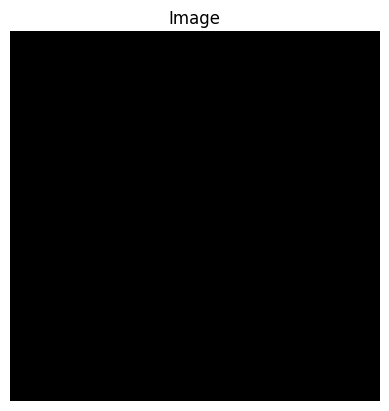

In [71]:
# Criando imagem com fundo preto
image = np.zeros((200,200), np.uint8)

# Exibindo a matriz da imagem
print("Matriz da imagem:\n", image)

# Exibindo a imagem
show_image(image)

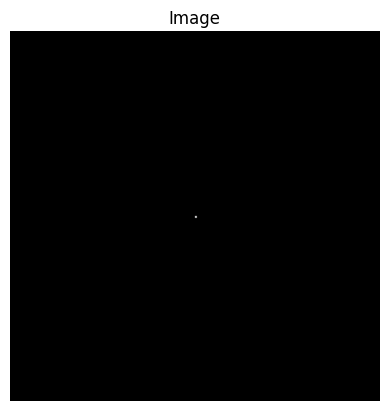

In [72]:
# Pintando um pixel de branco
image[100,100] = 255

# Exibindo a imagem
show_image(image)

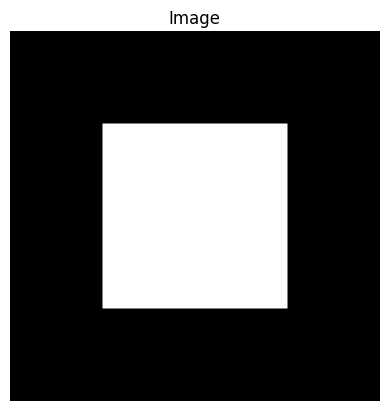

In [69]:
# Desenhando um retângulo branco
image[50:150, 50:150] = 255

# Exibindo a imagem
show_image(image)

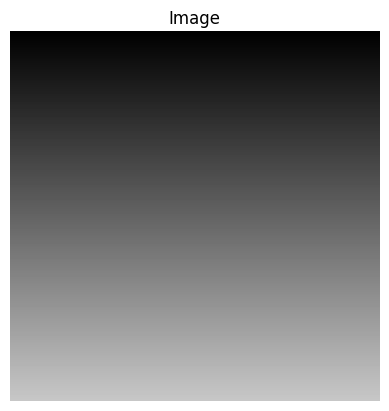

In [73]:
# Desenhando um gradiente
for i in range(200):
    image[i] = i

# Exibindo a imagem
show_image(image)

### Carregando e Exibindo Imagens

Vamos carregar uma imagem em escala de cinza e exibir sua representação matricial.

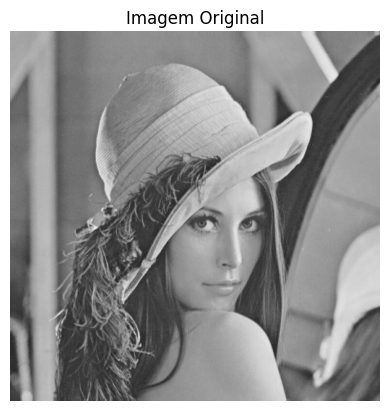

In [75]:
# Carregando uma imagem em escala de cinza
image_path = 'data/lenna.png'  # Substitua pelo caminho da sua imagem
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Mostrando a imagem carregada
show_image(image, title='Imagem Original')

In [76]:
# Exibindo a matriz da imagem
print("Matriz da imagem:\n", image)

Matriz da imagem:
 [[169 169 168 ... 175 162 138]
 [169 169 168 ... 175 162 138]
 [169 169 168 ... 175 162 138]
 ...
 [ 53  53  59 ... 115 112 114]
 [ 53  53  64 ... 117 118 122]
 [ 53  53  64 ... 117 118 122]]


## Seção 3: Operações Básicas com Numpy

### Operações com Matrizes

Usando `numpy`, podemos realizar diversas operações em matrizes de imagens, como acessar e modificar pixels, e criar novas imagens a partir de operações matemáticas.

### Exemplo: Acessando e Modificando Pixels

Vamos explorar como acessar e modificar valores de pixels.


In [77]:
# Obtendo dimensões da imagem
height, width = image.shape
print(f"Dimensões da imagem: {height}x{width}")

Dimensões da imagem: 512x512


In [78]:
# Acessando um pixel específico
pixel_value = image[100, 100]
print(f"Valor do pixel na posição (100, 100): {pixel_value}")

Valor do pixel na posição (100, 100): 116


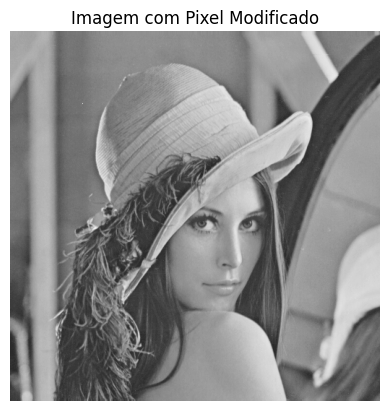

In [79]:
# Modificando um pixel específico
modified_image = image.copy()
modified_image[100, 100] = 255
show_image(modified_image, title='Imagem com Pixel Modificado')

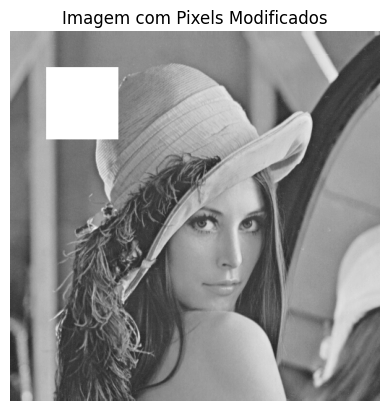

In [80]:
# Modificando um grupo de pixels
modified_image = image.copy()
modified_image[50:150, 50:150] = 255
show_image(modified_image, title='Imagem com Pixels Modificados')

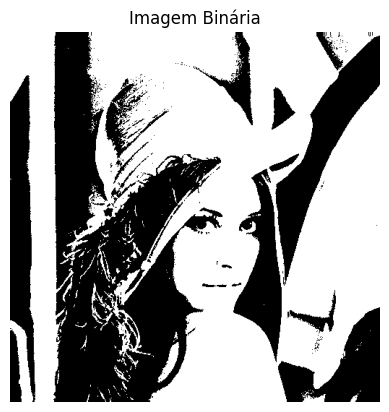

In [81]:
# Iterando sobre todos os pixels da imagem
modified_image = image.copy()

for i in range(height):
    for j in range(width):
        pixel_value = modified_image[i, j]
        if pixel_value < 128:
            modified_image[i, j] = 0
        else:
            modified_image[i, j] = 255

show_image(modified_image, title='Imagem Binária')

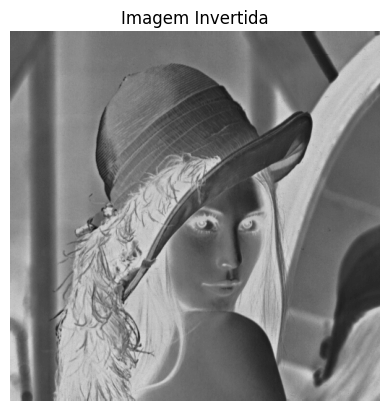

In [82]:
# Invertendo a imagem
inverted_image = 255 - image
show_image(inverted_image, title='Imagem Invertida')

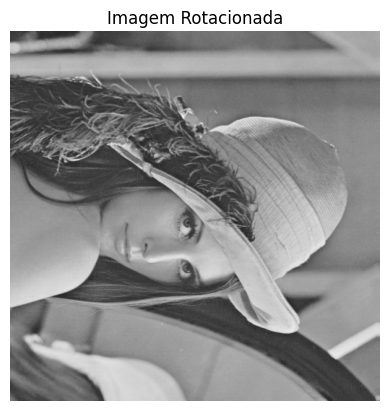

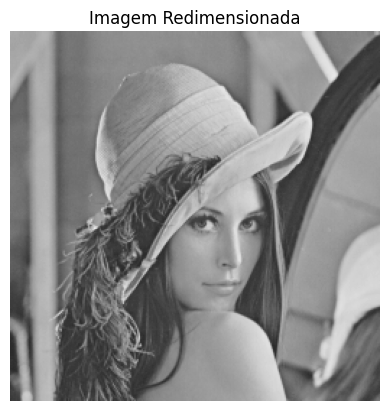

In [83]:
# Seção 5: Operações Básicas com Imagens

# Rotacionando a imagem
rotated_image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
show_image(rotated_image, title='Imagem Rotacionada')

# Redimensionando a imagem
resized_image = cv2.resize(image, (width // 2, height // 2))
show_image(resized_image, title='Imagem Redimensionada')

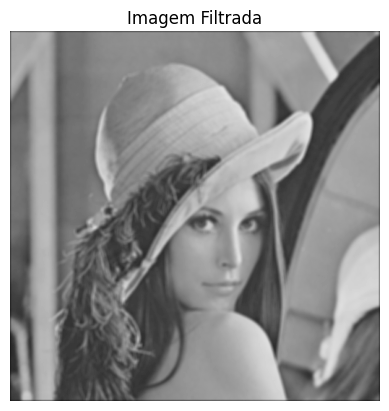

In [86]:
# Filtros
kernel = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

kernel = np.array([
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
]) / 25

def apply_filter(image, kernel):
    # Obtendo as dimensões da imagem e do kernel
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape
    
    # Calculando as dimensões do padding
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2
    
    # Aplicando padding à imagem
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)
    
    # Inicializando a imagem de saída
    filtered_image = np.zeros_like(image)
    
    # Aplicando a convolução
    for i in range(image_height):
        for j in range(image_width):
            region = padded_image[i:i + kernel_height, j:j + kernel_width]
            filtered_image[i, j] = np.sum(region * kernel)
    
    return filtered_image

filtered_image = apply_filter(image, kernel)
show_image(filtered_image, title='Imagem Filtrada')

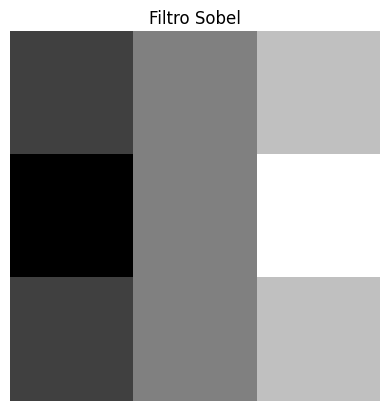

In [90]:
# Visualizando filtros
kernel = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

plt.imshow(kernel, cmap='gray')
plt.title('Filtro Sobel')
plt.axis('off')
plt.show()